# Phase 1: EEG Data Comprehension and Exploration

## Objective
Understand the structure, format, and characteristics of the Alcoholics EEG dataset to prepare for synthetic data generation.

## Dataset Information
- Source: Kaggle - Alcoholics EEG Dataset (nnair25/Alcoholics)
- Application: Will be used to develop methods applicable to cocaine craving EEG analysis
- Training files: 469
- Test files: 481

## 0. setup & Paths

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import Counter, defaultdict
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

In [29]:
path = kagglehub.dataset_download("nnair25/Alcoholics")
print("Path to dataset files:", path)

DATA_PATH = Path(path)
TRAIN_PATH = DATA_PATH / 'SMNI_CMI_TRAIN'
TEST_PATH = DATA_PATH / 'SMNI_CMI_TEST'

print(f"Data directory exists: {DATA_PATH.exists()}")
print(f"Training directory exists: {TRAIN_PATH.exists()}")
print(f"Test directory exists: {TEST_PATH.exists()}")

Path to dataset files: /Users/jacksonzhao/.cache/kagglehub/datasets/nnair25/Alcoholics/versions/1
Data directory exists: True
Training directory exists: True
Test directory exists: True


In [30]:
train_files = sorted(TRAIN_PATH.glob("*.csv"))
test_files  = sorted(TEST_PATH.glob("*.csv"))

print(f"Total training files: {len(train_files)}")
print(f"Total test files: {len(test_files)}")

Total training files: 468
Total test files: 480


## 1. Single-File Inspection

In [32]:
sample_file = train_files[0]
print("Sample file:", sample_file.name)

sample_df = pd.read_csv(sample_file)
print("Shape:", sample_df.shape)

print("Columns:")
print(list(sample_df.columns))

sample_df.head(10)

Sample file: Data1.csv
Shape: (16384, 10)
Columns:
['Unnamed: 0', 'trial number', 'sensor position', 'sample num', 'sensor value', 'subject identifier', 'matching condition', 'channel', 'name', 'time']


,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,5,0,FP1,0,-8.921,a,S1 obj,0,co2a0000364,0.000000
1,6,0,FP1,1,-8.433,a,S1 obj,0,co2a0000364,0.003906
2,7,0,FP1,2,-2.574,a,S1 obj,0,co2a0000364,0.007812
3,8,0,FP1,3,5.239,a,S1 obj,0,co2a0000364,0.011719
4,9,0,FP1,4,11.587,a,S1 obj,0,co2a0000364,0.015625
5,10,0,FP1,5,14.028,a,S1 obj,0,co2a0000364,0.019531
6,11,0,FP1,6,11.587,a,S1 obj,0,co2a0000364,0.023438
7,12,0,FP1,7,6.704,a,S1 obj,0,co2a0000364,0.027344
8,13,0,FP1,8,1.821,a,S1 obj,0,co2a0000364,0.031250
9,14,0,FP1,9,-1.109,a,S1 obj,0,co2a0000364,0.035156


In [34]:
print("Data Info:")
print(sample_df.info())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16384 entries, 0 to 16383
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16384 non-null  int64  
 1   trial number        16384 non-null  int64  
 2   sensor position     16384 non-null  object 
 3   sample num          16384 non-null  int64  
 4   sensor value        16384 non-null  float64
 5   subject identifier  16384 non-null  object 
 6   matching condition  16384 non-null  object 
 7   channel             16384 non-null  int64  
 8   name                16384 non-null  object 
 9   time                16384 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 1.3+ MB
None


In [35]:
print("Missing values:")
print(sample_df.isnull().sum())

Missing values:
Unnamed: 0            0
trial number          0
sensor position       0
sample num            0
sensor value          0
subject identifier    0
matching condition    0
channel               0
name                  0
time                  0
dtype: int64


In [36]:
print("Basic statistics:")
sample_df.describe()

Basic statistics:


,Unnamed: 0,trial number,sample num,sensor value,channel,time
count,16384.000000,16384.0,16384.000000,16384.000000,16384.000000,16384.000000
mean,8228.000000,0.0,127.500000,1.989997,31.500000,0.498047
std,4748.269011,0.0,73.902526,7.505248,18.473517,0.288682
min,5.000000,0.0,0.000000,-39.825000,0.000000,0.000000
25%,4116.500000,0.0,63.750000,-2.228000,15.750000,0.249023
50%,8228.000000,0.0,127.500000,1.221000,31.500000,0.498047
75%,12339.500000,0.0,191.250000,5.402000,47.250000,0.747070
max,16451.000000,0.0,255.000000,51.900000,63.000000,0.996094


In [39]:
print("Unique values in key columns:")

print("\nSensor positions (EEG channels):")
channels_sample = sorted(sample_df['sensor position'].unique())
print(channels_sample)
print("Number of channels:", len(channels_sample))

print("\nSubject identifiers:", sample_df['subject identifier'].unique())
print("Matching conditions:", sample_df['matching condition'].unique())
print("Trials:", sample_df['trial number'].nunique())
print("Unique subject ID:", sample_df['name'].unique())

Unique values in key columns:

Sensor positions (EEG channels):
['AF1', 'AF2', 'AF7', 'AF8', 'AFZ', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPZ', 'CZ', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCZ', 'FP1', 'FP2', 'FPZ', 'FT7', 'FT8', 'FZ', 'O1', 'O2', 'OZ', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'PO1', 'PO2', 'PO7', 'PO8', 'POZ', 'PZ', 'T7', 'T8', 'TP7', 'TP8', 'X', 'Y', 'nd']
Number of channels: 64

Subject identifiers: ['a']
Matching conditions: ['S1 obj']
Trials: 1
Unique subject ID: ['co2a0000364']


In [40]:
time_diff = sample_df['time'].diff().dropna().unique()
print("Unique time diffs (first 10):", time_diff[:10])

sampling_interval = sample_df['time'].diff().median()
sampling_rate = 1.0 / sampling_interval if sampling_interval > 0 else None
print(f"\nEstimated sampling rate: {sampling_rate:.1f} Hz")

Unique time diffs (first 10): [ 0.00390625 -0.99609375]

Estimated sampling rate: 256.0 Hz


## 2. Single-Trial, Single-Channel Signal Exploration

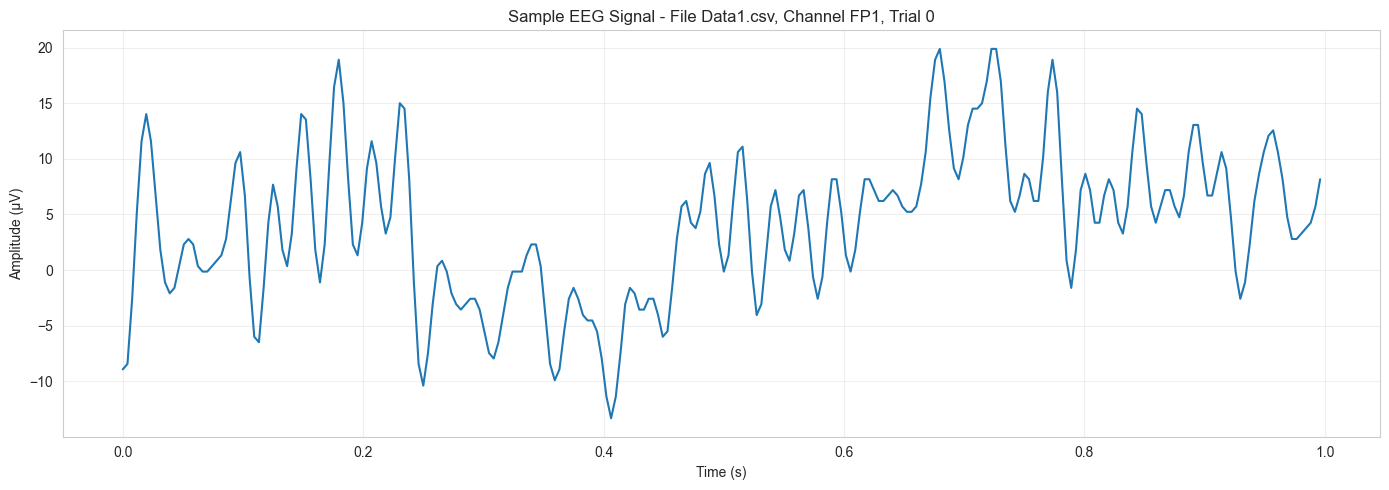

Signal duration: 1.00 seconds
Number of samples: 256


In [42]:
sample_channel = 'FP1'
sample_trial = 0

sample_trial_data = (
    sample_df[
        (sample_df['sensor position'] == sample_channel) &
        (sample_df['trial number'] == sample_trial)
    ]
    .sort_values('sample num')
)

plt.figure(figsize=(14, 5))
plt.plot(sample_trial_data['time'], sample_trial_data['sensor value'])
plt.title(f"Sample EEG Signal - File {sample_file.name}, Channel {sample_channel}, Trial {sample_trial}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Signal duration: {sample_trial_data['time'].max():.2f} seconds")
print(f"Number of samples: {len(sample_trial_data)}")


## 3. Balanced Subset (10 Alcoholic + 10 Control)

In [43]:
# Identify alcoholic vs control files

alcoholic_files = []
control_files   = []

print("Identifying subject types in training files...")
for file in train_files:
    df_peek = pd.read_csv(file, nrows=1)
    subject_type = df_peek['subject identifier'].iloc[0]
    if subject_type == 'a':
        alcoholic_files.append(file)
    else:
        control_files.append(file)
    if len(alcoholic_files) >= 10 and len(control_files) >= 10:
        break

print(f"Selected {len(alcoholic_files)} alcoholic files and {len(control_files)} control files.")

Identifying subject types in training files...
Selected 153 alcoholic files and 10 control files.


In [45]:
# Load a balanced subset into a combined DataFrame

sample_files = alcoholic_files[:10] + control_files[:10]
dfs = []

print(f"Loading {len(sample_files)} balanced files (10 alcoholic + 10 control)...")
for i, file in enumerate(sample_files):
    df = pd.read_csv(file)
    df['file_id'] = i
    dfs.append(df)
    if (i + 1) % 5 == 0:
        print(f"Loaded {i + 1}/{len(sample_files)} files...")

combined_df = pd.concat(dfs, ignore_index=True)
print("\nCombined subset shape:", combined_df.shape)
print(f"Memory usage: {combined_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Loading 20 balanced files (10 alcoholic + 10 control)...
Loaded 5/20 files...
Loaded 10/20 files...
Loaded 15/20 files...
Loaded 20/20 files...

Combined subset shape: (327680, 11)
Memory usage: 95.69 MB


In [48]:
# Class (alcoholic vs control) distribution in the subset
subject_counts = combined_df['subject identifier'].value_counts()
print("Subject Identifier Distribution:")
print(subject_counts)

print("\nClass distribution (percentage):")
print((subject_counts / subject_counts.sum() * 100).round(2))

Subject Identifier Distribution:
subject identifier
a    163840
c    163840
Name: count, dtype: int64

Class distribution (percentage):
subject identifier
a    50.0
c    50.0
Name: count, dtype: float64


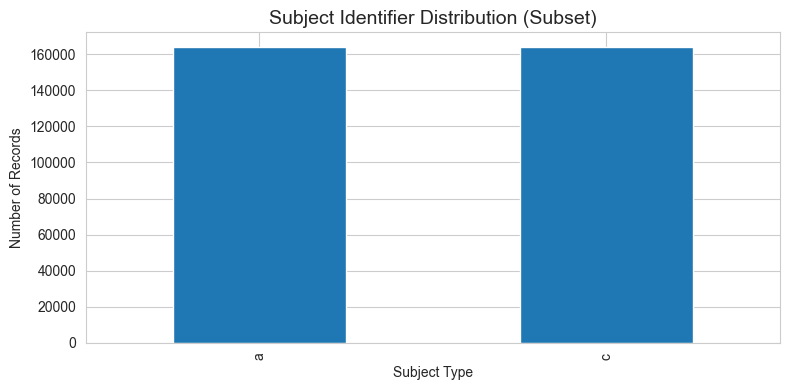

In [49]:
plt.figure(figsize=(8, 4))
subject_counts.plot(kind='bar')
plt.title('Subject Identifier Distribution (Subset)', fontsize=14)
plt.xlabel('Subject Type')
plt.ylabel('Number of Records')
plt.tight_layout()
plt.show()

In [53]:
# EEG channels distribution in the subset
channels = sorted(combined_df['sensor position'].unique())
print(f"EEG Channels ({len(channels)} total):")
print(channels)

EEG Channels (64 total):
['AF1', 'AF2', 'AF7', 'AF8', 'AFZ', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPZ', 'CZ', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCZ', 'FP1', 'FP2', 'FPZ', 'FT7', 'FT8', 'FZ', 'O1', 'O2', 'OZ', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'PO1', 'PO2', 'PO7', 'PO8', 'POZ', 'PZ', 'T7', 'T8', 'TP7', 'TP8', 'X', 'Y', 'nd']


This appears to be using the standard 10-20 EEG electrode placement system.


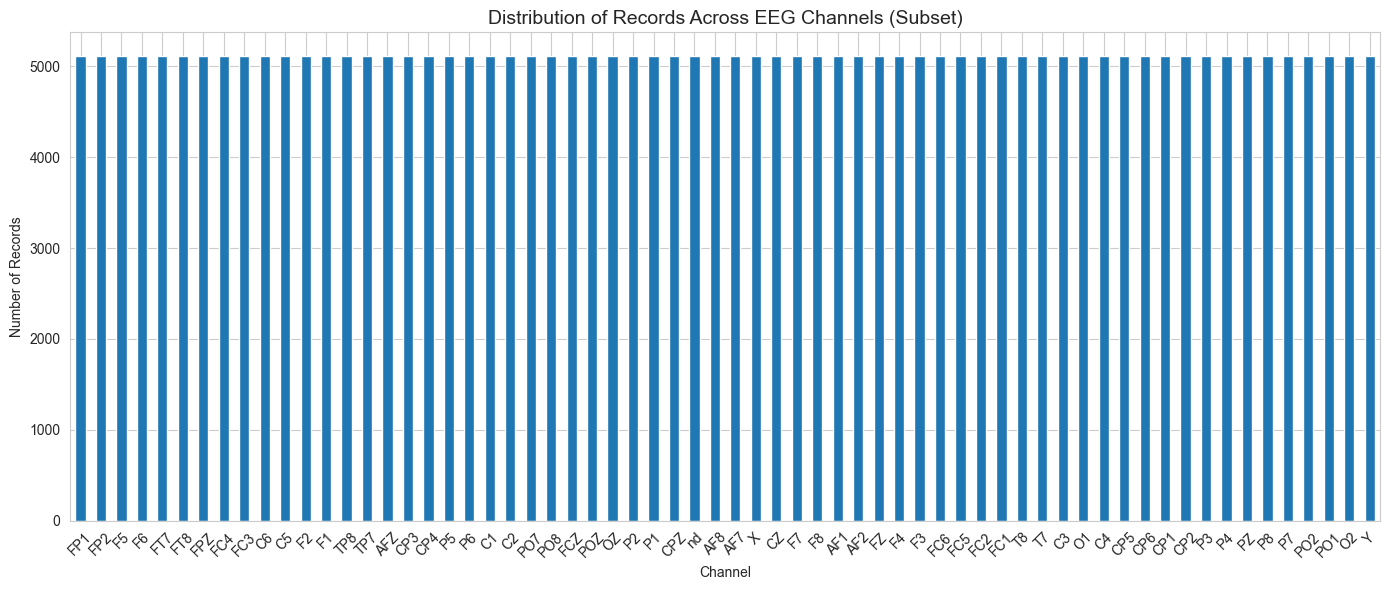

In [55]:
print("This appears to be using the standard 10-20 EEG electrode placement system.")
channel_counts = combined_df['sensor position'].value_counts()
plt.figure(figsize=(14, 6))
channel_counts.plot(kind='bar')
plt.title('Distribution of Records Across EEG Channels (Subset)', fontsize=14)
plt.xlabel('Channel')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Sensor Value Statistics (subset):
count    327680.000000
mean         -1.435347
std           8.793241
min         -85.510000
25%          -5.992000
50%          -1.282000
75%           2.909000
max         278.687000
Name: sensor value, dtype: float64


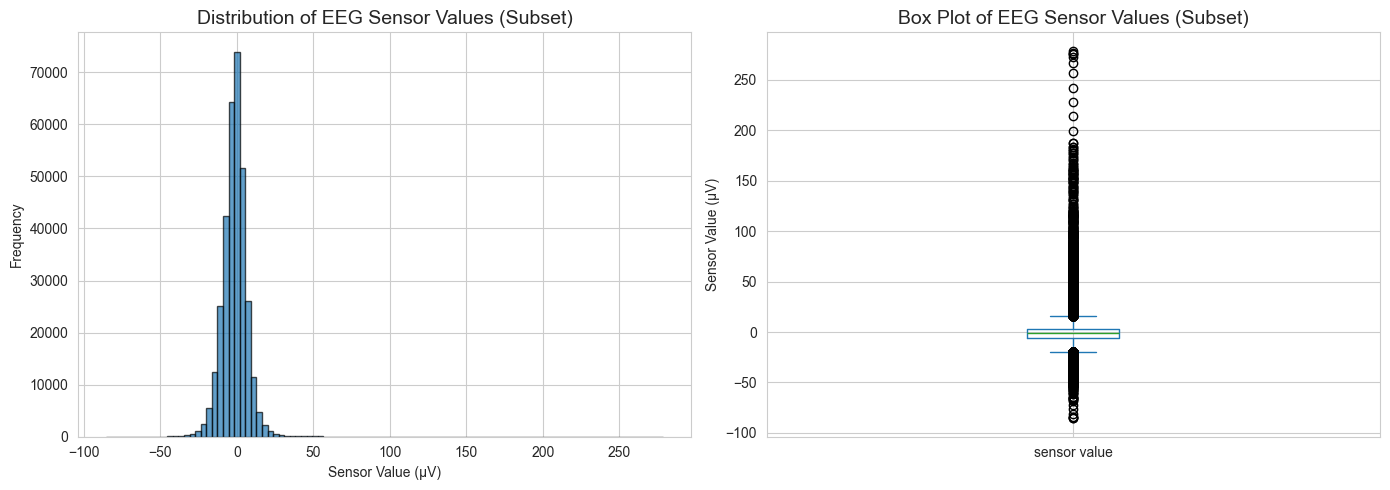

In [57]:
# Sensor value distribution in the subset
print("Sensor Value Statistics (subset):")
print(combined_df['sensor value'].describe())

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(combined_df['sensor value'], bins=100, alpha=0.7, edgecolor='black')
plt.title('Distribution of EEG Sensor Values (Subset)', fontsize=14)
plt.xlabel('Sensor Value (µV)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
combined_df['sensor value'].plot(kind='box')
plt.title('Box Plot of EEG Sensor Values (Subset)', fontsize=14)
plt.ylabel('Sensor Value (µV)')

plt.tight_layout()
plt.show()

## 4. Trial & Condition Structure (Subset)

In [58]:
# Trial information in the subset
print("Trial Information (subset):")
print(f"Number of unique trials: {combined_df['trial number'].nunique()}")
print(f"Trial range: {combined_df['trial number'].min()} to {combined_df['trial number'].max()}")

trial_counts = combined_df['trial number'].value_counts().sort_index()
print("\nRecords per trial:")
print(trial_counts)

Trial Information (subset):
Number of unique trials: 15
Trial range: 0 to 27

Records per trial:
trial number
0     32768
2     16384
13    16384
14    16384
15    16384
16    32768
17    32768
18    32768
19    16384
21    32768
23    16384
24    16384
25    16384
26    16384
27    16384
Name: count, dtype: int64


In [60]:
# Matching condition distribution in the subset
print("Matching Condition Distribution (subset):")
condition_counts = combined_df['matching condition'].value_counts()
print(condition_counts)

Matching Condition Distribution (subset):
matching condition
S1 obj         163840
S2 nomatch,     81920
S2 match        81920
Name: count, dtype: int64


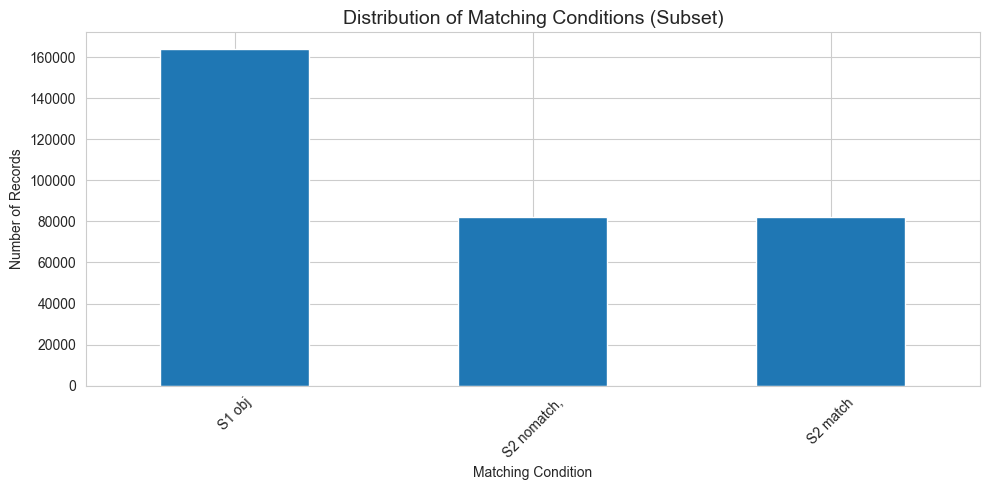

In [61]:
plt.figure(figsize=(10, 5))
condition_counts.plot(kind='bar')
plt.title('Distribution of Matching Conditions (Subset)', fontsize=14)
plt.xlabel('Matching Condition')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Full-Trial Metadata Analysis

In [62]:
# Participant and file-level metadata across all training files

import glob

paths = glob.glob(str(TRAIN_PATH / "*.csv"))

meta = []
for p in paths:
    df = pd.read_csv(p, usecols=['name', 'subject identifier'], nrows=5)
    meta.append((p, df['name'].iloc[0], df['subject identifier'].iloc[0]))

meta = pd.DataFrame(meta, columns=['file', 'name', 'subject'])
print('Files:', len(meta))
print('Unique participants:', meta['name'].nunique())
print("\nFiles per subject type:")
print(meta.groupby('subject')['name'].nunique())


Files: 468
Unique participants: 16

Files per subject type:
subject
a    8
c    8
Name: name, dtype: int64


In [65]:
# Matching condition counts across the full training set
cond = Counter()
file_sizes = []

for p in paths:
    d = pd.read_csv(p, usecols=['matching condition'])
    cond.update(d['matching condition'].value_counts().to_dict())
    file_sizes.append(Path(p).stat().st_size)

print('Matching condition counts (train):', dict(cond))

Matching condition counts (train): {'S2 nomatch,': 2441216, 'S2 match': 2605056, 'S1 obj': 2621440}


In [67]:
# Channel completeness & per-trial lengths (sanity checks)

# 1) channel completeness (on a subset or all; here first 50 for speed)
missing_channel_files = []
for p in paths[:50]:
    d = pd.read_csv(p, usecols=['sensor position'])
    chs = set(d['sensor position'].unique())
    if len(chs) < 64:
        missing_channel_files.append((p, len(chs)))

print('Files missing channels (among first 50):', len(missing_channel_files))

# 2) per-channel trial lengths distribution (sample)
lengths = defaultdict(int)
for p in paths[:30]:
    d = pd.read_csv(p, usecols=['trial number', 'sensor position', 'sample num'])
    n_per = d.groupby(['trial number', 'sensor position'])['sample num'].nunique()
    lengths.update(n_per.value_counts().to_dict())

print('Per-channel trial lengths (sample counts):', dict(lengths))

Files missing channels (among first 50): 0
Per-channel trial lengths (sample counts): {256: 64}


## 6. Summary

In [70]:
summary = {
    'total_train_files': len(train_files),
    'total_test_files': len(test_files),
    'num_channels': len(channels),
    'channels': channels,  # full list, optional
    'sampling_rate': sampling_rate,
    'total_unique_participants': meta['name'].nunique(),
    'subject_types': meta.groupby('subject')['name'].nunique().to_dict(),
    'matching_condition_counts_train': dict(cond),
}

print("\n" + "="*60)
print("DATA COMPREHENSION SUMMARY")
print("="*60)
for key, value in summary.items():
    if key != 'channels':  # channels list is long, print only if needed
        print(f"{key}: {value}")
print("="*60)


DATA COMPREHENSION SUMMARY
total_train_files: 468
total_test_files: 480
num_channels: 64
sampling_rate: 256.0
total_unique_participants: 16
subject_types: {'a': 8, 'c': 8}
matching_condition_counts_train: {'S2 nomatch,': 2441216, 'S2 match': 2605056, 'S1 obj': 2621440}
